# __Exploring Airbnb Market Trends in NYC__

<h2 style='text-align: left;'> Project Description </h2>
<p style="font-size: 16px; text-align: left;"> Welcome to New York City, In this project, we will take a closer look at the New York Airbnb market by combining data from multiple file types like .csv, .tsv, and .xlsx. </p>

<center><img src='nyc.jpg' alt="Your Image"></center>

**CSV**, **TSV**, and **Excel** files containing data on 2019 Airbnb listings

**airbnb_price.csv**
This is a CSV file containing data on Airbnb listing prices and locations.
- **`listing_id`**: unique identifier of listing
- **`price`**: nightly listing price in USD
- **`nbhood_full`**: name of borough and neighborhood where listing is located

**airbnb_room_type.xlsx**
This is an Excel file containing data on Airbnb listing descriptions and room types.
- **`listing_id`**: unique identifier of listing
- **`description`**: listing description
- **`room_type`**: Airbnb has three types of rooms: shared rooms, private rooms, and entire homes/apartments

**airbnb_last_review.tsv**
This is a TSV file containing data on Airbnb host names and review dates.
- **`listing_id`**: unique identifier of listing
- **`host_name`**: name of listing host
- **`last_review`**: date when the listing was last reviewed

In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Using pandas methods to read files

airbnb_price = pd.read_csv("airbnb_price.csv")
airbnb_room_type = pd.read_excel("airbnb_room_type.xlsx")
airbnb_last_review = pd.read_csv("airbnb_last_review.tsv", delimiter='\t')

In [3]:
# Looking at the data

print(airbnb_price.head(), "\n")
print(airbnb_room_type.head(), "\n")
print(airbnb_last_review.head())

   listing_id        price                nbhood_full
0        2595  225 dollars         Manhattan, Midtown
1        3831   89 dollars     Brooklyn, Clinton Hill
2        5099  200 dollars     Manhattan, Murray Hill
3        5178   79 dollars  Manhattan, Hell's Kitchen
4        5238  150 dollars       Manhattan, Chinatown 

   listing_id                                description        room_type
0        2595                      Skylit Midtown Castle  Entire home/apt
1        3831            Cozy Entire Floor of Brownstone  Entire home/apt
2        5099  Large Cozy 1 BR Apartment In Midtown East  Entire home/apt
3        5178            Large Furnished Room Near B'way     private room
4        5238         Cute & Cozy Lower East Side 1 bdrm  Entire home/apt 

   listing_id    host_name   last_review
0        2595     Jennifer   May 21 2019
1        3831  LisaRoxanne  July 05 2019
2        5099        Chris  June 22 2019
3        5178     Shunichi  June 24 2019
4        5238          

In [4]:
# Merging two DataFrames at a time on a common column

merged_df = pd.merge(airbnb_price, airbnb_room_type, on='listing_id', how='left')
airbnb = pd.merge(merged_df, airbnb_last_review, on='listing_id', how='left')
airbnb.head()

,listing_id,price,nbhood_full,description,room_type,host_name,last_review
0,2595,225 dollars,"Manhattan, Midtown",Skylit Midtown Castle,Entire home/apt,Jennifer,May 21 2019
1,3831,89 dollars,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,Entire home/apt,LisaRoxanne,July 05 2019
2,5099,200 dollars,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,Chris,June 22 2019
3,5178,79 dollars,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,private room,Shunichi,June 24 2019
4,5238,150 dollars,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,Ben,June 09 2019


In [5]:
# Explore data types of the airbnb DataFrame.
print(airbnb.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   price        25209 non-null  object
 2   nbhood_full  25209 non-null  object
 3   description  25199 non-null  object
 4   room_type    25209 non-null  object
 5   host_name    25201 non-null  object
 6   last_review  25209 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB
None


## Cleaning Data

I. Extract the first part of strings in the `'price'` column and save it in a new column named `'price_dollars'`.

II. Split `'nbhood_full'` and save the first part in a new column named `'borough'`.

III. Check `'room_type'` and convert all entries to lowercase.

IV. Use the pandas `.to_datetime()` method to convert the 'last_review' column to datetime.

In [6]:
# Extract fisrt part of strings in 'price' column and save it in new column 'price_dollars'
airbnb['price_dollars'] = airbnb['price'].str.replace('[^\d.]', '', regex=True).astype(float)

# Alternative way: use --> airbnb['price_dollars'] = airbnb['price'].str.split().str[0].astype(float)

# This code splits each element in the 'nbhood_full' column by commas, extracts the first part, and then applies the lower().title() transformations 
# to each element using the apply method.
airbnb['borough'] = airbnb['nbhood_full'].str.split(',').str[0].apply(lambda x: x.lower().title())

# Lower and then title each element of room_type column
airbnb['room_type'] = airbnb['room_type'].str.lower().apply(lambda x: x.title())

# Convert elements of last_review column to datetime
airbnb['last_review'] = pd.to_datetime(airbnb['last_review'])

airbnb.head()

,listing_id,price,nbhood_full,description,room_type,host_name,last_review,price_dollars,borough
0,2595,225 dollars,"Manhattan, Midtown",Skylit Midtown Castle,Entire Home/Apt,Jennifer,2019-05-21,225.0,Manhattan
1,3831,89 dollars,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,Entire Home/Apt,LisaRoxanne,2019-07-05,89.0,Brooklyn
2,5099,200 dollars,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,Entire Home/Apt,Chris,2019-06-22,200.0,Manhattan
3,5178,79 dollars,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,Private Room,Shunichi,2019-06-24,79.0,Manhattan
4,5238,150 dollars,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,Entire Home/Apt,Ben,2019-06-09,150.0,Manhattan


## EDA (Exploratory Data Analysis)

In [7]:
# Finding the earliest and most recent dates
print(airbnb['last_review'].min().date())
print(airbnb['last_review'].max().date())

2019-01-01
2019-07-09


In [8]:
# Finding how many listings are private rooms
print(airbnb['room_type'].value_counts(), '\n')

airbnb['room_type'].value_counts().iloc[1]

room_type
Entire Home/Apt    13266
Private Room       11356
Shared Room          587
Name: count, dtype: int64 



11356

In [9]:
# Loading the solution data into a DataFrame
# Pass a dictionary into the pd.DataFrame() constructor specifying the desired column names 
# (first_reviewed, last_reviewed, nb_private_rooms, and avg_price) as keys, and your saved variables as values.

airbnb_dict = {'first_reviewed': airbnb['last_review'].min().date(), 
               'last_reviewed': airbnb['last_review'].max().date(),
               'nb_private_rooms': airbnb['room_type'].value_counts().iloc[1],
               'avg_price': airbnb['price_dollars'].mean().round(2)}

In [10]:
# This summary is very limited and we need more details
pd.DataFrame(airbnb_dict, index=['summary'])

,first_reviewed,last_reviewed,nb_private_rooms,avg_price
summary,2019-01-01,2019-07-09,11356,141.78


In [11]:
# Summary Statistics and Boxplots for each room type

## Summary Statistics and Visualization

In [12]:
# Summary statistics for each room type in each borough
summary_statistics = airbnb.groupby(['borough', 'room_type'])['price_dollars'].describe()

# Print summary statistics
print(summary_statistics)

                                count        mean         std   min     25%  \
borough       room_type                                                       
Bronx         Entire Home/Apt   261.0  120.517241   73.566380  35.0   80.00   
              Private Room      404.0   56.153465   22.820721   0.0   40.00   
              Shared Room        33.0   33.030303   11.555531  20.0   28.00   
Brooklyn      Entire Home/Apt  5367.0  169.903671  114.292801  10.0  107.00   
              Private Room     4910.0   72.629328  115.075108   0.0   50.00   
              Shared Room       189.0   39.005291   24.529942   0.0   27.00   
Manhattan     Entire Home/Apt  6170.0  238.024473  204.624347  16.0  145.00   
              Private Room     3901.0  105.698795   77.552981  10.0   70.00   
              Shared Room       251.0   72.960159   59.883140  25.0   49.00   
Queens        Entire Home/Apt  1335.0  140.931086  100.653218  10.0   90.00   
              Private Room     2009.0   63.741165   

In [13]:
# Check how many price elements are equal to zero.
x = airbnb[airbnb['price_dollars']==0]['price_dollars'].count()
y = airbnb['price_dollars'].count()
print(x)
print((x/y)*100, '%')

7
0.027767860684676106 %


In [14]:
# It's much less than 5 percent, so we can safely remove these rows
airbnb = airbnb[airbnb['price_dollars'] != 0]

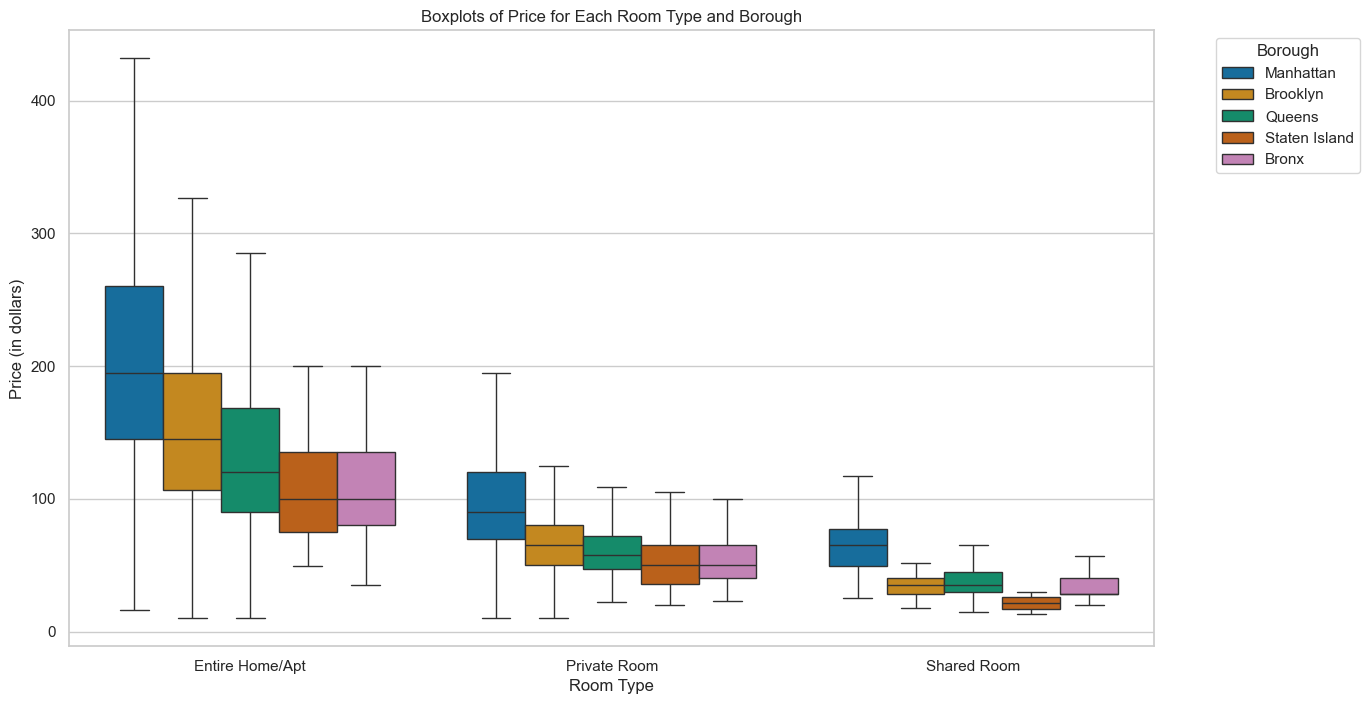

In [15]:
# Boxplots of price for each room type and borough
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid", palette="colorblind")

sns.boxplot(x='room_type', y='price_dollars', hue='borough', data=airbnb, showfliers=False)

plt.title('Boxplots of Price for Each Room Type and Borough')
plt.xlabel('Room Type')
plt.ylabel('Price (in dollars)')
plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()